# GRIP_The Spark Foundation (Task - 1)

Using simple linear regression for predicting the percentage of marks a student will score based on number of hours the student studies.

Name : Yash Vardhan

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [13]:
#reading the data and displaying it
data=pd.read_csv("G:\\TSF_data\\Task2_data.csv")

print("data read successfully")

data.head(10)

data read successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9C3F73A00>,
      dtype=object)

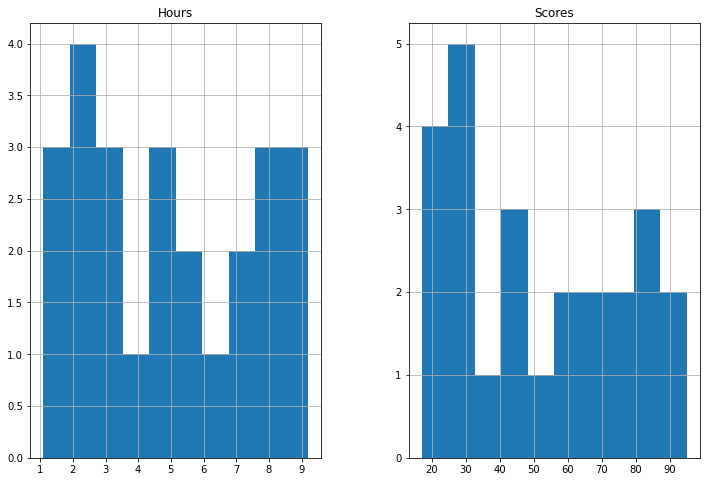

In [50]:
data.hist(figsize=(12,8))

A histogram gives us an idea about nature of distribution of data i.e. whether the data is normally distributed or it is skewed either positively or negetively. In the above histogram, we can observe for both Hours and Scores, there is a very minor skew in the positive side because many of the data points lies in this region though this very slight skew does not indicate that outliers are present in the data.

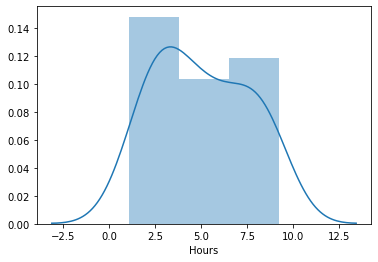

In [63]:
sns.distplot(data['Hours'])

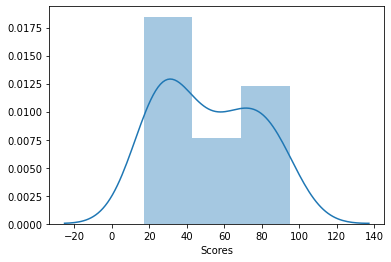

In [52]:
sns.distplot(data['Scores'])

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

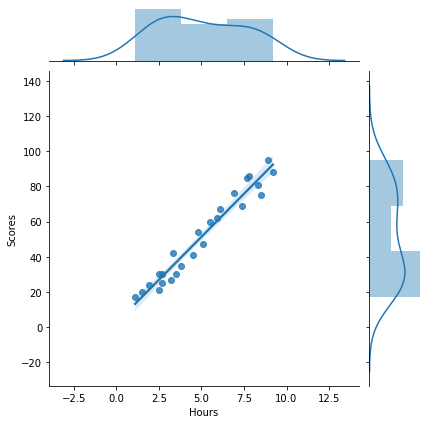

In [95]:
sns.jointplot(data['Hours'], data['Scores'], kind ="reg")

Another way to visualize a relationship between two variables in seaborn is to use the jointplot() function, which creates a scatterplot of the two variables along with the histograms of each next to the appropriate axes. This plot is useful in analysing whether a linear relationship exists in between two variables or not along with the best fit line.

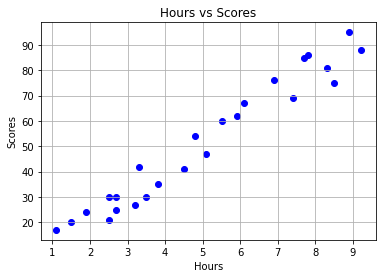

In [36]:
# Plotting the distribution of scores
plt.scatter(x= data["Hours"],y= data["Scores"], color='Blue',marker='o')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.grid()

The above scatter plot confirms that there is a linear relationship between the two variable and as the Hours of study by student increases scores also increases.

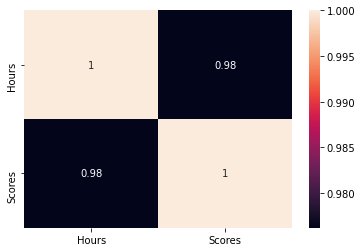

In [64]:
sns.heatmap(data.corr(), annot=True)

The Heatmaps helps in analysing correlation that may exists between variables. There is a very strong positive correlation of 98% between Scores and Hours.  

In [99]:
#Seperating the Independent variable from the Dependent variable 

x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [103]:
#Splitting the data into train set and test sets in ratio 80:20 respectively

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=1234) 
#random_state defines a seed value which allows us to keep same sample for train & test set for future use thus maintainiung consistency in model

In [111]:
#Training the linear model on train set

from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(x_train, y_train)
print("Training Comleted")

Training Comleted


lmplot() is one of the most widely used function to quickly plot the Linear Relationship between 2 variables

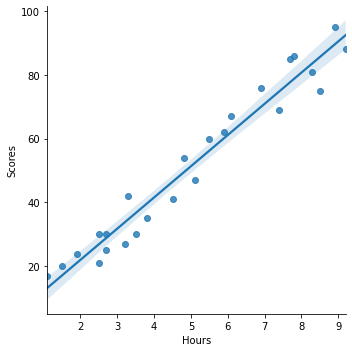

In [68]:
sns.lmplot(x="Hours",y="Scores", data=data)

In [105]:
#Making prediction on test set
y_pred = lm.predict(x_test)

In [109]:
#comparing the actual value aginst the predicted value on test set and creating a data frame for the same

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,60,57.155166
1,30,27.122537
2,27,34.130151
3,75,87.187796
4,47,53.150816


We can also use this model to pass any arbitrary value and predict the value of dependent variable

In [110]:
val = 9.25
val_pred = lm.predict([[val]])
print("No of Hours = {}".format(val))
print("Predicted Score = {}".format(val_pred[0]))

No of Hours = 9.25
Predicted Score = 94.69595283072871


Now, evaluate the model to check it's performance and how robust is it on future data. We are using here R-squared score metric for this purpose

In [114]:
#Model evaluation

from sklearn import metrics  
print('R-Squared Value is:', 
      metrics.r2_score(y_test, y_pred))

R-Squared Value is: 0.8452606709019266


As we can see that R-squared value is approx 0.845. r squared value basically tells us how much variance is explaned by dependent variable is explained by independent variables. In this case, around 84.5% of variance is explained which is a good score as per industry standards.  